# Final Project Analisis Data: E-Commerce Public Dataset

- Nama: Muhammad Nur Adnan
- Email: mnuradn16@gmail.com
- ID Dicoding: adhsn16

## Menentukan Pertanyaan Bisnis

- Bagaimana Demografi Pelanggan yang Perusahaan Miliki?
- Kategori Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
- Metode Pembayaran Apa yang Sering Digunakan Pelanggan?

## Menyiapkan Semua Library yang Dibutuhkan

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

### Gathering Data

In [196]:
customers_df = pd.read_csv("customers_dataset.csv")
geolocation_df = pd.read_csv("geolocation_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
product_category_name_translation_df = pd.read_csv("product_category_name_translation.csv")
products_df = pd.read_csv("products_dataset.csv")
sellers_df = pd.read_csv("sellers_dataset.csv")

In [197]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [198]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [199]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [200]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [201]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [202]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [203]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [204]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [205]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assesing Data

#### Menilai Data customers_df

In [206]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [207]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [208]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {customers_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data geolocation_df

In [209]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [210]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [211]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {geolocation_df.duplicated().sum()}")

Jumlah duplikasi data: 261831


#### Menilai Data order_items_df

In [212]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [213]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [214]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {order_items_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data order_payments_df

In [215]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [216]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [217]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {order_payments_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data order_reviews_df

In [218]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [219]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [220]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {order_reviews_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data orders_df

In [221]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [222]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [223]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {orders_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data product_category_name_translation_df

In [224]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [225]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [226]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {product_category_name_translation_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data products_df

In [227]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [228]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [229]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {products_df.duplicated().sum()}")

Jumlah duplikasi data: 0


#### Menilai Data sellers_df

In [230]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [231]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [232]:
# mengecek duplicates data
print(f"Jumlah duplikasi data: {products_df.duplicated().sum()}")

Jumlah duplikasi data: 0


### Cleaning Data

#### Membersihkan Data customers_df

In [233]:
drop_columns = ["customer_unique_id","customer_zip_code_prefix"]

for kolom in drop_columns:
    customers_df.drop(columns=[kolom], inplace=True)

#### Membersihkan Data orders_df

In [234]:
drop_columns = ["order_approved_at","order_delivered_carrier_date"]

for kolom in drop_columns:
    orders_df.drop(columns=[kolom], inplace=True)

#### Membersihkan Data order_reviews_df

In [235]:
drop_columns = ["review_comment_title","review_comment_message"]
datetime_columns = ["review_creation_date","review_answer_timestamp"]

for kolom in drop_columns:
    order_reviews_df.drop(columns=[kolom], inplace=True)

for kolom in datetime_columns:
    order_reviews_df[kolom] = pd.to_datetime(order_reviews_df[kolom])

#### Membersihkan Data products_df

In [236]:
drop_columns = ['product_name_lenght', 
                     'product_description_lenght', 
                     'product_weight_g', 
                     'product_length_cm', 
                     'product_height_cm',
                     'product_width_cm',
                     'product_photos_qty']

for kolom in drop_columns:
    products_df.drop(columns=[kolom], inplace=True)

### Merge Data yang akan digunakan untuk menjawab pertanyaan bisnis

In [237]:
customers_orders = pd.merge(
    left=customers_df,
    right=orders_df,
    how="inner",
    on="customer_id"
)

items_products_df = order_items_df.merge(
    products_df, on="product_id",how="inner"
)

orders_items_products = pd.merge(
    left=customers_orders,
    right=items_products_df, 
    on="order_id", 
    how="left"
)

orders_items_products = orders_items_products.merge(
    product_category_name_translation_df, on="product_category_name", how="left"
)

all_df = pd.merge(
    left =orders_items_products,
    right=order_payments_df,
    how="inner",
    on="order_id"
)

In [238]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118431 entries, 0 to 118430
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118431 non-null  object 
 1   customer_city                  118431 non-null  object 
 2   customer_state                 118431 non-null  object 
 3   order_id                       118431 non-null  object 
 4   order_status                   118431 non-null  object 
 5   order_purchase_timestamp       118431 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  118431 non-null  object 
 8   order_item_id                  117601 non-null  float64
 9   product_id                     117601 non-null  object 
 10  seller_id                      117601 non-null  object 
 11  shipping_limit_date            117601 non-null  object 
 12  price                         

In [239]:
all_df.isna().sum()

customer_id                         0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
product_category_name            2528
product_category_name_english    2553
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [240]:
all_df.duplicated().sum()

0

### Cleaning Merge Data

In [241]:
# drop kolum yang tidal akan digunakan
drop_columns = ["freight_value", "payment_sequential", "payment_installments", "product_category_name"]

for kolom in drop_columns:
    all_df.drop(columns=[kolom], inplace=True)

In [242]:
# me rename kolum product_category_name_english
all_df.rename(columns={
    "product_category_name_english":"product_category"
}, inplace=True)

In [243]:
# mengisi missing values dengan modus
all_df["product_category"] = all_df["product_category"].fillna(all_df["product_category"].mode()[0])
all_df["order_item_id"] = all_df["order_item_id"].fillna(all_df["order_item_id"].mode()[0])

# menghilangkan sisa missing values
all_df.dropna(axis=0, inplace=True)

In [244]:
datetime_columns = ["order_purchase_timestamp","order_delivered_customer_date","order_estimated_delivery_date", "shipping_limit_date"]

for kolom in datetime_columns:
    all_df[kolom] = pd.to_datetime(all_df[kolom])

In [245]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115034 entries, 0 to 118430
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115034 non-null  object        
 1   customer_city                  115034 non-null  object        
 2   customer_state                 115034 non-null  object        
 3   order_id                       115034 non-null  object        
 4   order_status                   115034 non-null  object        
 5   order_purchase_timestamp       115034 non-null  datetime64[ns]
 6   order_delivered_customer_date  115034 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115034 non-null  datetime64[ns]
 8   order_item_id                  115034 non-null  float64       
 9   product_id                     115034 non-null  object        
 10  seller_id                      115034 non-null  object        
 11  shipp

## Exploratory Data Analysis (EDA)

In [246]:
# Melihat demografi pelanggan berdasarkan kota
all_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index()

,customer_city,order_id
0,sao paulo,15046
1,rio de janeiro,6604
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
...,...,...
4080,ponto novo,1
4081,ponto do marambaia,1
4082,ponto belo,1
4083,pontes gestal,1


In [247]:
# Melihat demografi pelanggan berdasarkan negara bagian
all_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()

,customer_state,order_id
0,SP,40494
1,RJ,12353
2,MG,11355
3,RS,5344
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


In [248]:
# Melihat produk dengan penjualan terbaik dan terburuk
all_df.groupby(by="product_category").order_id.nunique().sort_values(ascending=False).reset_index()

,product_category,order_id
0,bed_bath_table,10676
1,health_beauty,8648
2,sports_leisure,7530
3,computers_accessories,6529
4,furniture_decor,6307
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,7


In [249]:
# Melihat metode pembayaran yang sering digunakan pelanggan
all_df.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74303
boleto         19191
voucher         3679
debit_card      1484
Name: customer_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi Pelanggan yang Perusahaan Miliki?

- Berdasarkan Kota

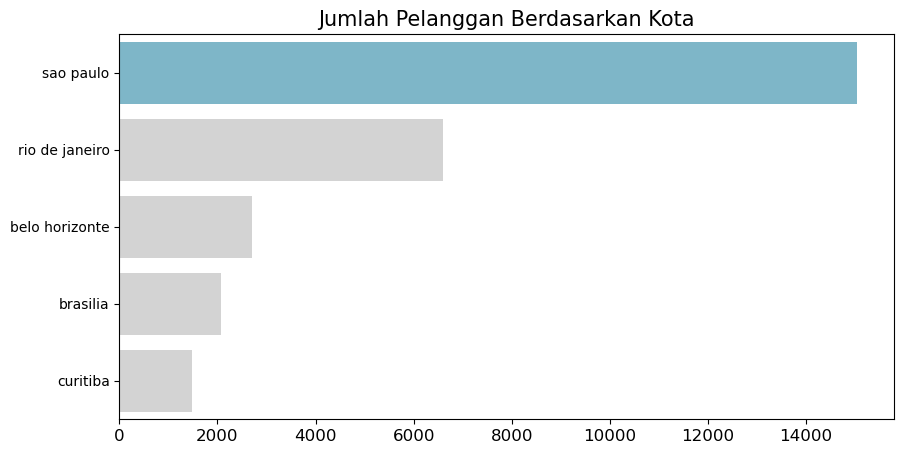

In [250]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(5)
bycity_df.rename(columns={
    "customer_id":"customer_count"
}, inplace=True)
bycity_df

plt.figure(figsize=(10, 5))
colors_= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pelanggan Berdasarkan Kota", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

- Berdasarkan Negara Bagian

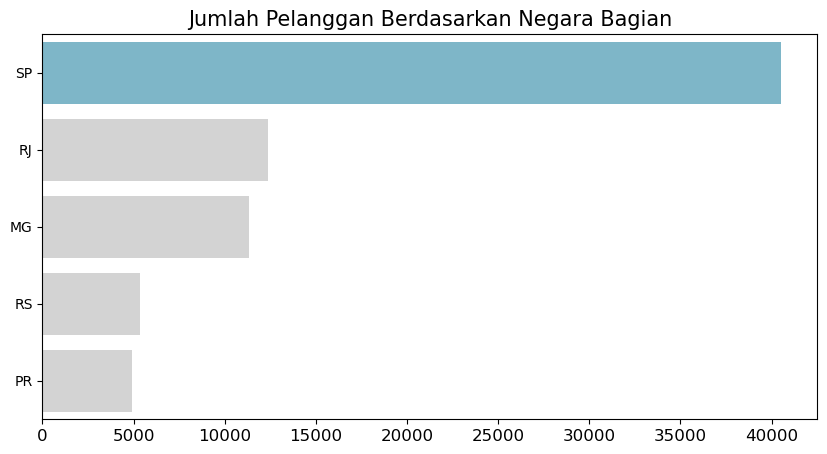

In [251]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(5)
bystate_df.rename(columns={
    "customer_id":"customer_count"
}, inplace=True)
bystate_df

plt.figure(figsize=(10, 5))
colors_= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pelanggan Berdasarkan Negara Bagian", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [252]:
sum_order_products_df = all_df.groupby("product_category").order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_products_df.head(10)

,product_category,order_id
0,bed_bath_table,10676
1,health_beauty,8648
2,sports_leisure,7530
3,computers_accessories,6529
4,furniture_decor,6307
5,housewares,5743
6,watches_gifts,5493
7,telephony,4093
8,auto,3809
9,toys,3804


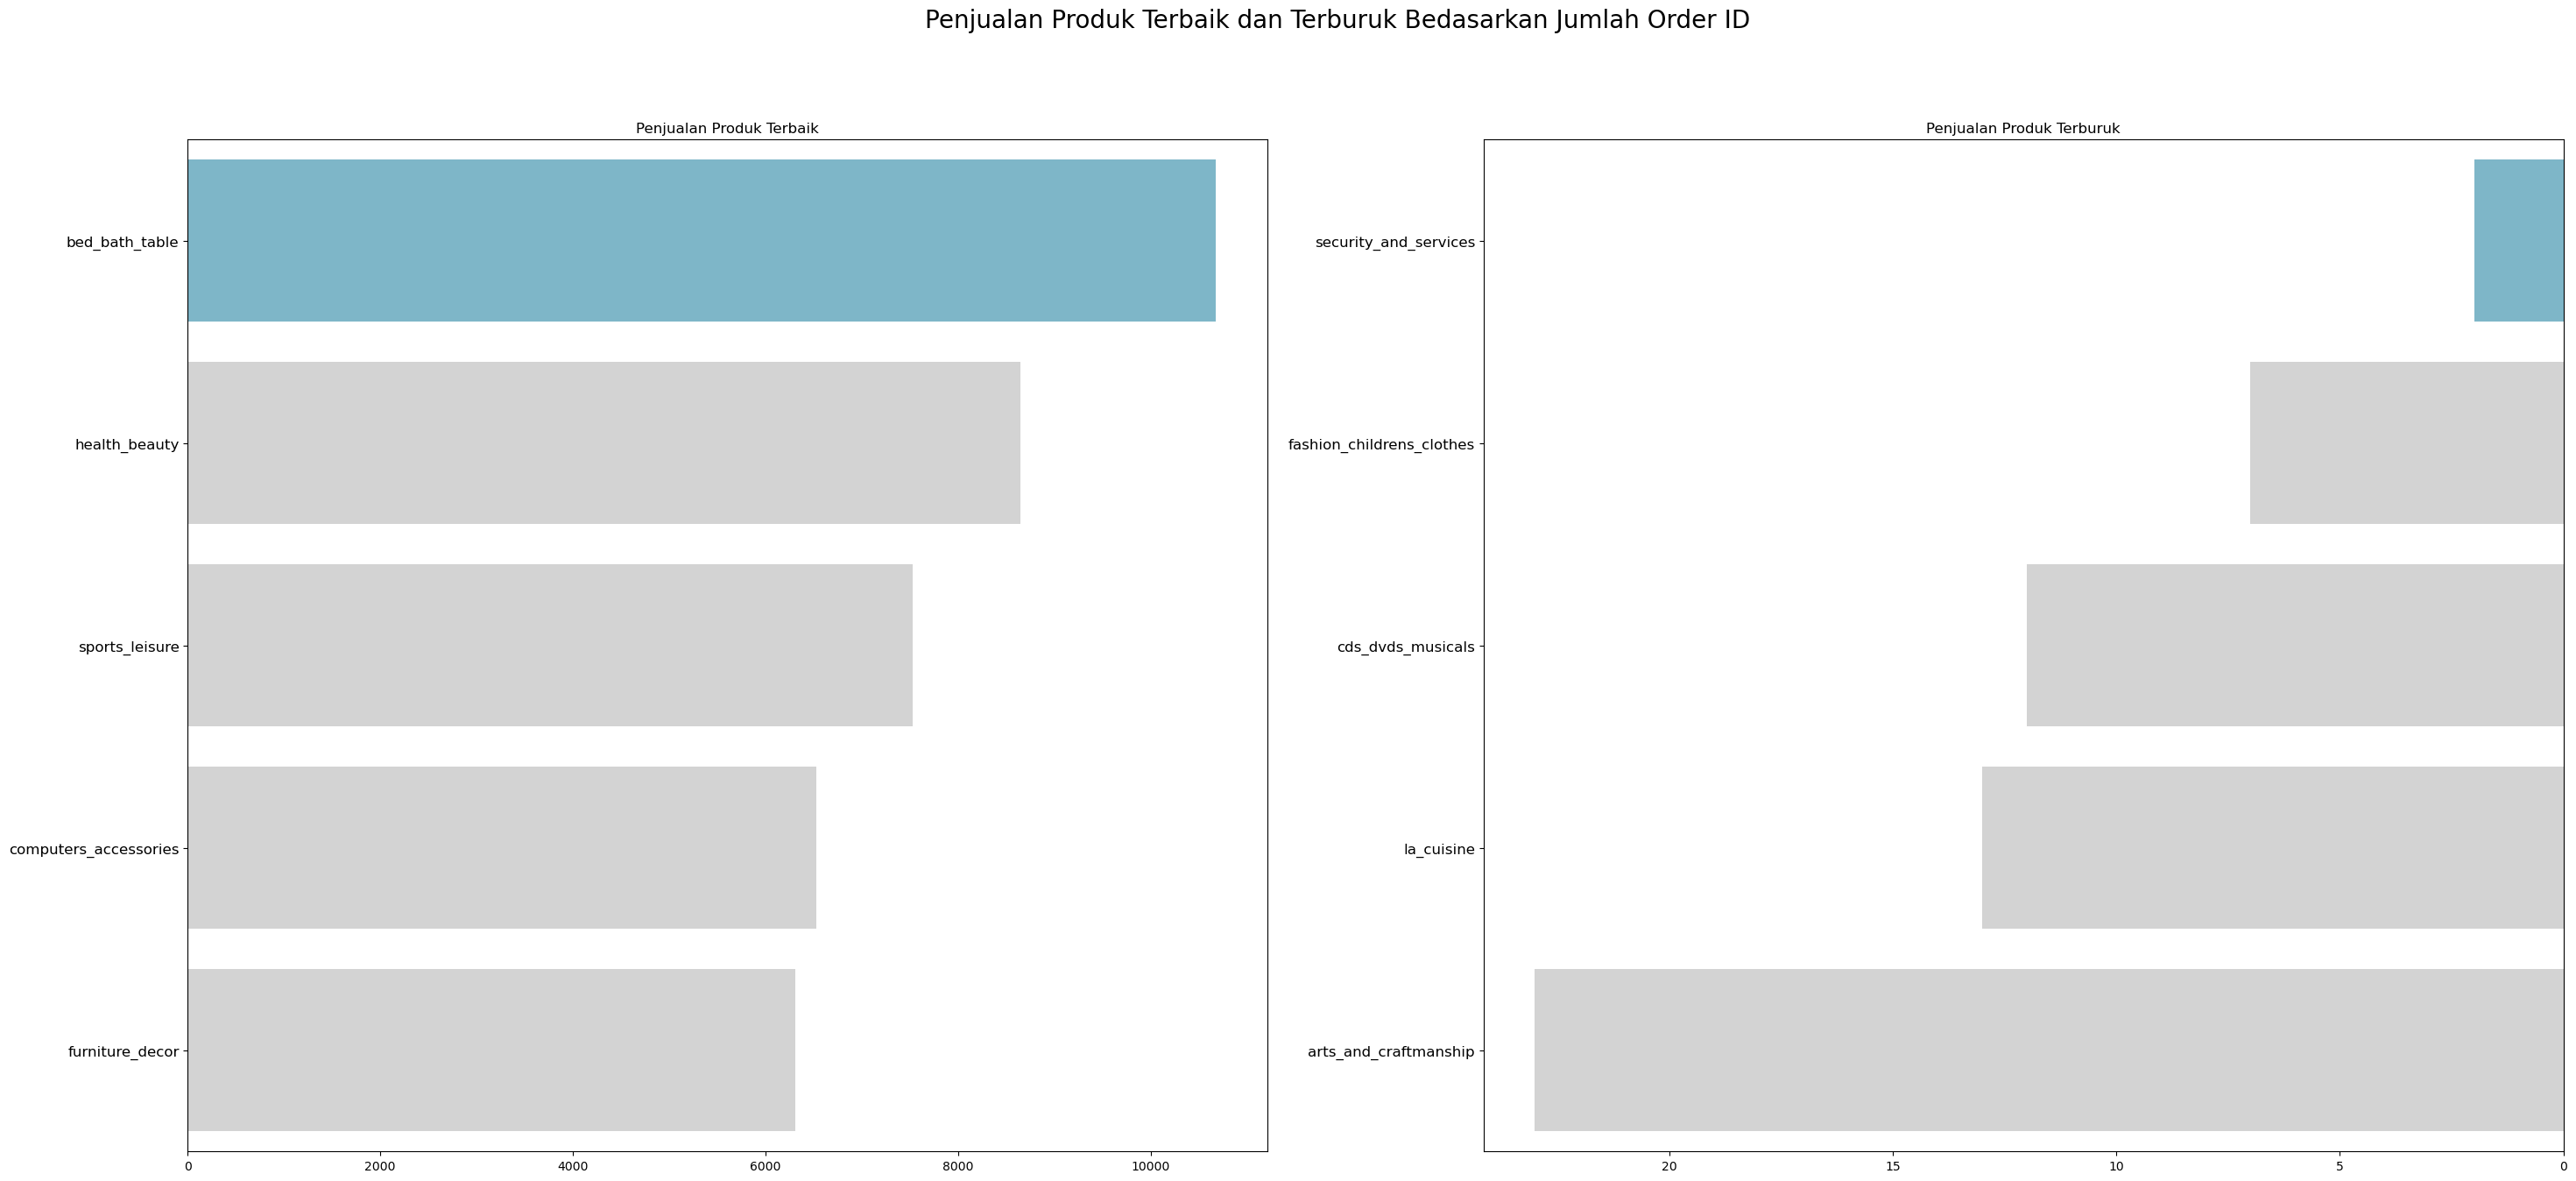

In [253]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35,15))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y = "product_category", data=sum_order_products_df.head(5), palette = colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Penjualan Produk Terbaik", loc="center", fontsize=12)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="order_id", y="product_category", data = sum_order_products_df.sort_values(by="order_id", ascending = True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Penjualan Produk Terburuk", loc="center", fontsize=12)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("Penjualan Produk Terbaik dan Terburuk Bedasarkan Jumlah Order ID",fontsize=20)
plt.show()

### Pertanyaan 3: Metode Pembayaran Apa yang Paling Sering Digunakan Pelanggan?

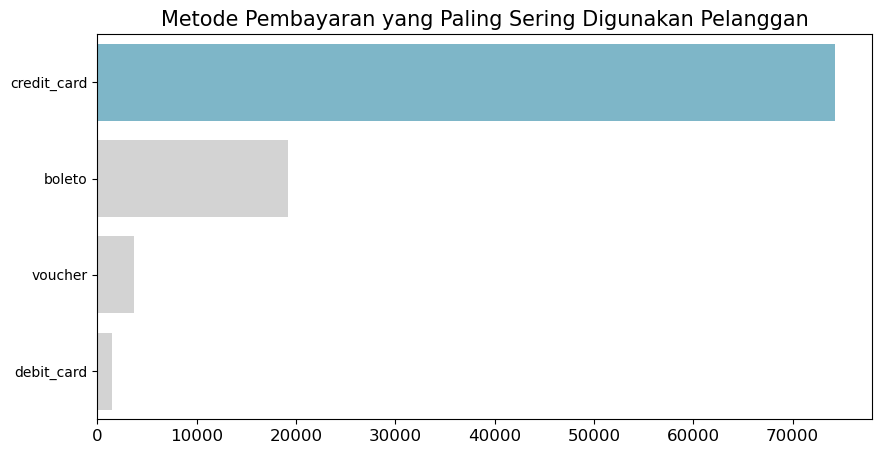

In [254]:
bymethod_df = all_df.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False).reset_index()
bymethod_df.rename(columns={
    "customer_id":"customer_count"
}, inplace=True)
bymethod_df

plt.figure(figsize=(10, 5))
colors_= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="payment_type",
    data=bymethod_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Metode Pembayaran yang Paling Sering Digunakan Pelanggan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclussion

Q1: Pelanggan terbanyak perusahaan sepanjang tahun 2016-2018 berasal dari kota Sao Paulo sebesar 15046 pelanggan. Sementara pelanggan terbanyak perusahaan berasal dari negara bagian SP sebesar 40494 pelanggan.

Q2: Produk dengan penjualan terbaik sepanjang tahun 2016-2018 adalah bed_bath_table. Sementara produk dengan penjualan terburuk sepanjang tahun 2016-2018 adalah security_and_services.

Q3: Metode pembayaran yang paling sepanjang tahun 2016-2018 sering digunakan pelanggan sepangjang tahun 2016-201 8adalah metode pembayaran kartu kredit dan boleto.